### Import Necessary Library

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [23]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Data Understanding and Preperation

In [24]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [25]:
fraud_data['income'] = fraud_data['Taxable.Income'].apply(lambda x :'Risky' if x<= 30000 else 'Good')


In [26]:
del fraud_data['Taxable.Income']

In [27]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'income'],
      dtype='object')

In [28]:
fraud_data.rename(columns={'Marital.Status':'Marital_Status', 'City.Population':'City_population', 'Work.Experience':'Work_experience'},inplace=True)
fraud_data

,Undergrad,Marital_Status,City_population,Work_experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [29]:
fraud_data.Marital_Status

0        Single
1      Divorced
2       Married
3        Single
4       Married
         ...   
595    Divorced
596    Divorced
597    Divorced
598     Married
599    Divorced
Name: Marital_Status, Length: 600, dtype: object

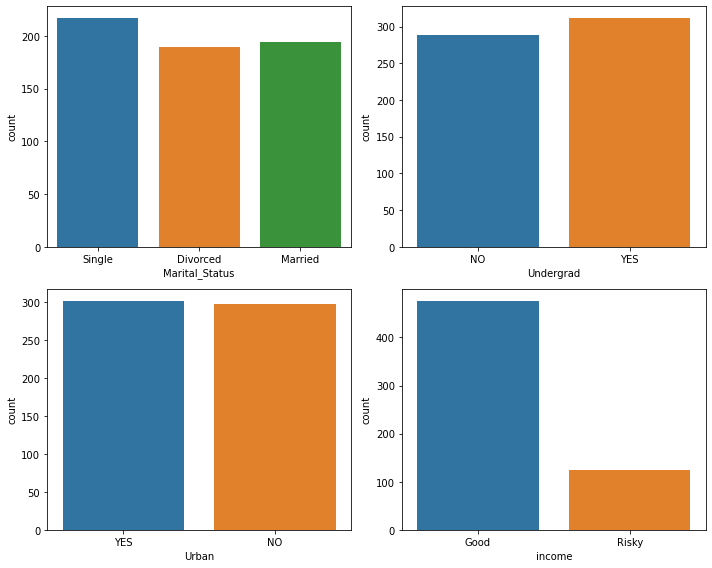

In [30]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig, ax =plt.subplots(2,2)
sns.countplot(fraud_data.Marital_Status,ax=ax[0,0])
sns.countplot(fraud_data.Undergrad,ax=ax[0,1])
sns.countplot(fraud_data.Urban,ax=ax[1,0])
sns.countplot(fraud_data.income,ax=ax[1,1])
fig.show()

In [31]:
le = LabelEncoder()
fraud_data['Undergrad'] = le.fit_transform(fraud_data.Undergrad)
fraud_data['Marital_Status'] = le.fit_transform(fraud_data.Marital_Status)
fraud_data['Urban'] = le.fit_transform(fraud_data.Urban)
fraud_data['income'] = le.fit_transform(fraud_data.income)
fraud_data

,Undergrad,Marital_Status,City_population,Work_experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


### Model building

In [32]:
X = fraud_data.iloc[:,:-1]
y = fraud_data.iloc[:,-1:]

In [33]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X)
scaled_X = pd.DataFrame(data = scaled_X,columns=X.columns)
scaled_X

,Undergrad,Marital_Status,City_population,Work_experience,Urban
0,-1.040833,1.160800,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,1.033109,1.634639,0.993355
3,0.960769,1.160800,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,0.960769,-1.274445,-1.390432,-0.968710,0.993355
596,0.960769,-1.274445,-1.071672,-1.534655,0.993355
597,-1.040833,-1.274445,0.909696,-1.761033,0.993355
598,0.960769,-0.056822,1.432197,0.163181,-1.006689


In [34]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,random_state=12,test_size=0.20,stratify=y)
X_train.shape,X_test.shape

((480, 5), (120, 5))

### Model testing, Training and evaluation

ACCURANCY    :  0.7583333333333333
PRECISION    :  0.25
RECALL       :  0.08
ROC          :  0.508421052631579


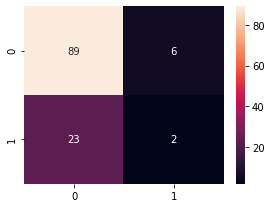

In [71]:
plt.figure(figsize=(4,3))
rand_model = RandomForestClassifier(class_weight={0:0.62992126,1:2.42424242})
rand_model.fit(X_train,y_train)
y_pred_test = rand_model.predict(X_test)
print('ACCURANCY    : ',accuracy_score(y_test,y_pred_test))
print('PRECISION    : ',precision_score(y_test,y_pred_test))
print('RECALL       : ',recall_score(y_test,y_pred_test))
print('ROC          : ',roc_auc_score(y_test,y_pred_test))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)
plt.show()

In [41]:
y_train.value_counts()

income
0         381
1          99
dtype: int64

In [61]:
from sklearn.utils.class_weight import compute_class_weight

In [63]:
cw = compute_class_weight('balanced', [0,1], y = y_train.income)
cw

array([0.62992126, 2.42424242])

#### output is imbalanced

**TUNIG MODEL TO GET BEST SCORE**

In [33]:
grid = GridSearchCV(estimator=rand_model,param_grid={
    'criterion' : ['gini','entropy'],
    'max_depth' : range(0,10),
    'max_features' : range(1,5)})
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'max_features': range(1, 5)})

In [34]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2}

In [35]:
grid.best_score_

0.7458333333333333

**we got out model at 75% testing accuracy**